In [15]:
import struct 
import numpy as np
from sklearn import neighbors, metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def read_idx(file_name):
    with open(file_name, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype = np.uint8).reshape(shape)

In [17]:
from PIL import Image
import numpy as np
def check_data(img, label):
    img = Image.fromarray(img)
    img.show()
    print(label)

In [18]:
def flat_matrix(matrix, rows_num, col_num):
    return np.reshape(matrix, (rows_num, col_num))

In [19]:
train_data = flat_matrix(read_idx('train-images.idx3-ubyte'), 60000, 28*28)
train_label = read_idx('train-labels.idx1-ubyte')
test_data = flat_matrix(read_idx('t10k-images.idx3-ubyte'), 10000, 28*28)
test_label = read_idx('t10k-labels.idx1-ubyte')

C:\Users\shilo\AppData\Local\Temp\ipykernel_26240\132011618.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(f.read(), dtype = np.uint8).reshape(shape)


In [20]:
#train_mask = ((train_label == 2) | (train_label == 3) | (train_label == 8))
X = train_data/255.0
Y = train_label

In [21]:
#test_mask = ((test_label == 2) | (test_label == 3) | (test_label == 8))
x_test = test_data/255.0
y_true = test_label


In [22]:
from sklearn.linear_model import LogisticRegression
print(X)
print(Y)
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, Y)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 5 6 8]


D:\ANAONA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


D:\ANAONA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


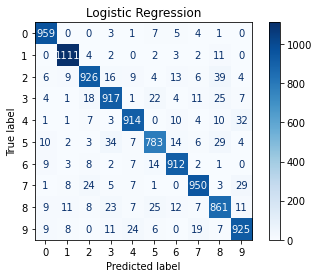

In [25]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(clf, x_test, y_true, colorbar=True, cmap='Blues') 
plt.title('Logistic Regression') 

plt.show()

In [24]:
y_pred_res = clf.predict(x_test)
print(classification_report(y_true, y_pred_res, labels=[i for i in range(10)]))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

